In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

<AxesSubplot:>

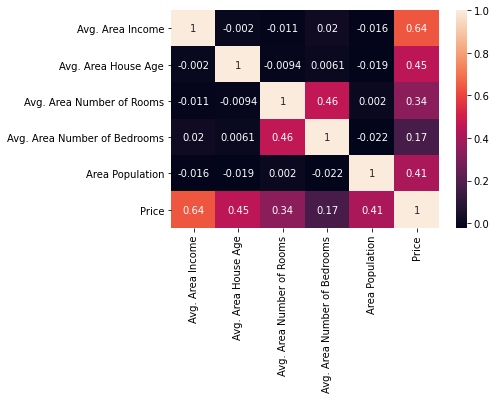

In [10]:
sns.heatmap(df.corr(),annot=True)

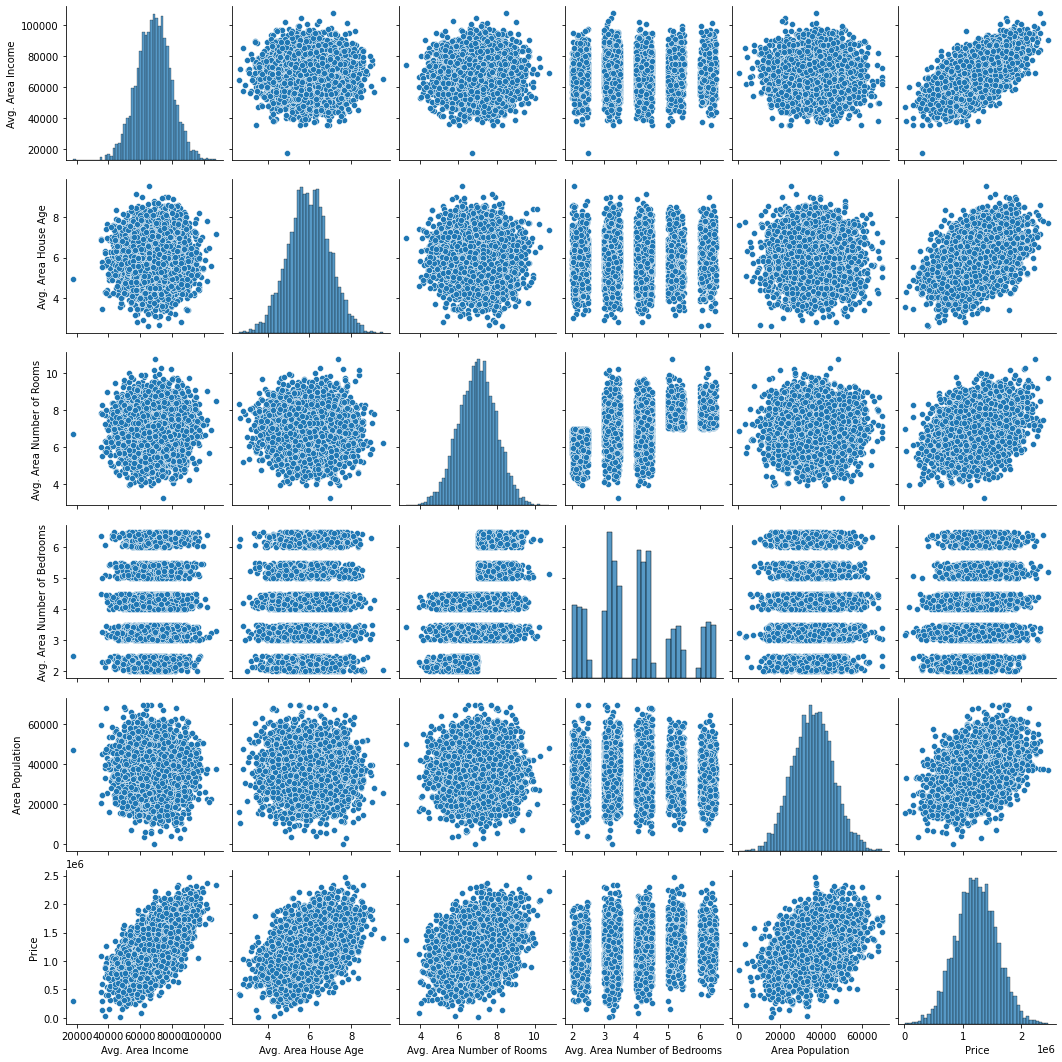

In [7]:
sns.pairplot(df)

In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df)
profile

In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [23]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [24]:
y=df['Price']

In [20]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\vemul\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


You are using pip version 10.0.1, however version 20.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
print("The intercepts are:-",lm.intercept_)

The intercepts are:- -2640159.7968526958


In [33]:
print("The coeffecients are:", lm.coef_)

The coeffecients are: [2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [36]:
final_regression_line=pd.DataFrame(lm.coef_, index=X.columns,columns=['Coeffecients'])

In [37]:
final_regression_line

Coeffecients
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

From the above dataframe, we can draw facts like for every one unit increase in Avg.Area income, there will 21.5 dollars increase in the price.

For every one unit increase in Avg.Area Number of Rooms, there will be 122368.67 dollars increase in the house price.

This type of approach gives the idea of how to evaluate an House Price.

## Prediction Starts Here

In [38]:
predictions=lm.predict(X_test)

In [39]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

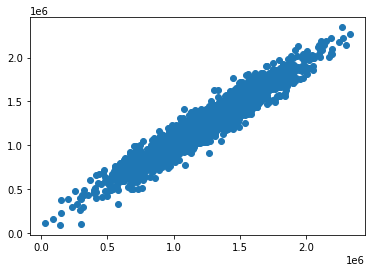

In [40]:
plt.scatter(y_test,predictions)

c:\users\vemul\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

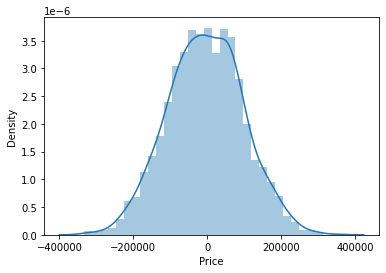

In [46]:
#this is the residual plot
sns.distplot((y_test-predictions))

### Here we got normal distribution for residuals, so we can say that linear regression is the best choice for this case

### Now we will do the evaluation of the model

In [47]:
from sklearn import metrics

In [48]:
#calculating the mean absolute error
metrics.mean_absolute_error(y_test, predictions)

82288.22251914945

In [49]:
#calculating the mean squared error
metrics.mean_squared_error(y_test, predictions)

10460958907.208984

In [50]:
#calculating the root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.829222909